In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Common:
import numpy as np
import pandas as pd
import tensorflow as tf
from IPython.display import clear_output as cls

# Data:
from glob import glob
from tqdm import tqdm
import tensorflow.data as tfd

# Data Visualization
import matplotlib.pyplot as plt

# Model:
from tensorflow import keras
from tensorflow.keras import callbacks
from tensorflow.keras import layers

In the **data loading and model building process**, various constants are defined and used to **streamline the workflow** **and** ensure consistency in the results. Below are some of the essential constants used in the process:

* **IMG_WIDTH**: This constant defines the width of the input image and is used in the preprocessing step to resize the images.

* **IMG_HEIGHT**: This constant defines the height of the input image and is used in the preprocessing step to resize the images.

* **BATCH_SIZE**: This constant defines the number of images to be processed in a single batch during training and testing.

* **EPOCHS**: This constant defines the number of times the training data set is passed through the model during the training process.

* **LEARNING_RATE**: This constant defines the rate at which the model's weights are updated during training and affects how quickly the model learns.

* **NUM_CLASSES**: This constant defines the number of classes in the data set, which is used to define the output layer of the model.

* **SEED**: This constant is used to set the random seed, ensuring that the results are reproducible.

* **TRAIN_CSV**: This constant defines the path to the CSV file containing the training data set's file names and labels.

* **TEST_CSV**: This constant defines the path to the CSV file containing the testing data set's file names and labels.

* **VALID_CSV**: This constant defines the path to the CSV file containing the validation data set's file names and labels.

By defining these constants and using them throughout the data loading and model building process, it is possible to achieve consistent and reproducible results.

In [ ]:
# Image size
IMG_WIDTH = 950
IMG_HEIGHT = 400

# Batch Size
BATCH_SIZE = 16

# EPOCHS
EPOCHS = 100

# Model Name
MODEL_NAME = 'prescription-OCR'

# Callbacks
CALLBACKS = [
    callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    callbacks.ModelCheckpoint(filepath=MODEL_NAME + ".h5", save_best_only=True)
]

# Learning Rate
LEARNING_RATE = 1e-3

# Random Seed
np.random.seed(2569)
tf.random.set_seed(2569)

# File Paths
train_csv_path = '/content/drive/MyDrive/extracted_data/train_refined.csv'
valid_csv_path = '/content/drive/MyDrive/extracted_data/valid_refined.csv'
test_csv_path = '/content/drive/MyDrive/extracted_data/test_refined.csv'

train_image_dir = '/content/drive/MyDrive/extracted_data/train'
valid_image_dir = '/content/drive/MyDrive/extracted_data/validate'
test_image_dir = '/content/drive/MyDrive/extracted_data/test'


# AUTOTUNE
AUTOTUNE = tfd.AUTOTUNE

# **Data Loading**
---

To load the **images with their respective labels** in the OCR task, we need to first examines the **CSV files** containing the **file names and corresponding text written in the images**. By parsing these CSV files, the notebook can **load the images and their labels efficiently**. This approach simplifies the data loading process and facilitates the model building process.

In [ ]:
# Train CSV
train_csv = pd.read_csv(train_csv_path)

# Validation CSV
valid_csv = pd.read_csv(valid_csv_path)

# Test CSV
test_csv = pd.read_csv(test_csv_path)

In [ ]:

print("Train_size: ", len(train_csv))
print("Test_size: ", len(test_csv))
print("Validation_size: ", len(valid_csv))

Train_size:  1614
Test_size:  474
Validation_size:  307


In [ ]:
# Data Size
TRAIN_SIZE = len(train_csv)
VALID_SIZE = len(test_csv)
TEST_SIZE  = len(valid_csv)

In [ ]:
# import os

# def delete_rows_with_missing_images(dataframe, image_path_column):
#     rows_to_delete = []

#     for index, row in dataframe.iterrows():
#         image_path = os.path.join(row[image_path_column])

#         # Check if the image path exists
#         if not os.path.exists(image_path):
#             print(f"Image not found for index {index}. Deleting row.")
#             rows_to_delete.append(index)

#     # Drop rows with missing images
#     dataframe = dataframe.drop(rows_to_delete, axis=0)

#     return dataframe

# # Load CSV files into DataFrames
# train_csv = pd.read_csv('/content/drive/MyDrive/extracted_data/train.csv')
# valid_csv = pd.read_csv('/content/drive/MyDrive/extracted_data/validate.csv')
# test_csv = pd.read_csv('/content/drive/MyDrive/extracted_data/test.csv')

# # Delete rows with missing images from each DataFrame
# train_csv = delete_rows_with_missing_images(train_csv, 'FILENAME')
# valid_csv = delete_rows_with_missing_images(valid_csv, 'FILENAME')
# test_csv = delete_rows_with_missing_images(test_csv, 'FILENAME')

In [ ]:
train_csv.head(100)

,FILENAME,IDENTITY
0,/content/drive/MyDrive/extracted_data/train/Lu...,Luracine-5
1,/content/drive/MyDrive/extracted_data/train/Pa...,Paraleadoxin-1
2,/content/drive/MyDrive/extracted_data/train/Lu...,Luracine-2
3,/content/drive/MyDrive/extracted_data/train/Ni...,Nitrous Oxide-5
4,/content/drive/MyDrive/extracted_data/train/Di...,Dimercoprol-3
...,...,...
95,/content/drive/MyDrive/extracted_data/train/Ch...,Chlophazimine-1
96,/content/drive/MyDrive/extracted_data/train/Ha...,Haloperidol-1
97,/content/drive/MyDrive/extracted_data/train/Ph...,Phentolamine-5
98,/content/drive/MyDrive/extracted_data/train/Hy...,Hydroxizine-2


In [ ]:
train_labels = [str(word) for word in train_csv['IDENTITY'].to_numpy()]
train_labels[:10]

['Luracine-5',
 'Paraleadoxin-1',
 'Luracine-2',
 'Nitrous Oxide-5',
 'Dimercoprol-3',
 'Paraminosolisilic Acid-3',
 'Paraminosolisilic Acid-1',
 'Dimercoprol-2',
 'Frusemide-1',
 'Methyl Chlorothiazide-2']

In [ ]:
# Unique Characters:
unique_chars = set(char for word in train_labels for char in word)
n_classes = len(unique_chars)

# Show
print(f"Total number of unique characters : {n_classes}")
print(f"Unique Characters : \n{unique_chars}")

Total number of unique characters : 66
Unique Characters : 
{'a', 'g', 'M', 't', 'o', 'Z', 'C', 'N', ' ', 'k', '.', '_', '-', 'V', 'T', 'v', 'j', 'R', 'W', 'q', '2', 'D', 'z', 'b', '1', 'G', '5', 'U', 'n', 'i', '’', 'O', 'Q', 'F', 'l', 'c', '(', 'x', 'd', '4', 'I', 'm', 'Y', 'L', 'S', 'P', 'r', 's', 'H', 'B', 'y', 'E', '7', 'e', 'p', '0', '–', 'A', 'w', 'u', ')', '6', '&', 'h', '3', 'f'}


In [ ]:
MAX_LABEL_LENGTH = max(map(len, train_labels))
print(f"Maximum length of a label : {MAX_LABEL_LENGTH}")

Maximum length of a label : 49


For now, in this CSV files, we have the file name and the respective text written in the image. Let's do one thing, let's add the full path with the filename.

In [ ]:
# train_csv['FILENAME'] = [train_image_dir + f"/{filename}" for filename in train_csv['FILENAME']]
# valid_csv['FILENAME'] = [valid_image_dir + f"/{filename}" for filename in valid_csv['FILENAME']]
# test_csv['FILENAME']  = [test_image_dir + f"/{filename}" for filename in test_csv['FILENAME']]

In [ ]:
train_csv.head()

,FILENAME,IDENTITY
0,/content/drive/MyDrive/extracted_data/train/Lu...,Luracine-5
1,/content/drive/MyDrive/extracted_data/train/Pa...,Paraleadoxin-1
2,/content/drive/MyDrive/extracted_data/train/Lu...,Luracine-2
3,/content/drive/MyDrive/extracted_data/train/Ni...,Nitrous Oxide-5
4,/content/drive/MyDrive/extracted_data/train/Di...,Dimercoprol-3


# Label Preprocessing:

To feed the labels to deep learning models, we need to convert the string format into numerical values. To do this, we'll create two dictionaries: one that maps categorical values to numerical values, and another that maps those numerical values back to the original strings for inference. These mappings are crucial for building an accurate OCR model.

In [ ]:
# Character to numeric value dictionary
char_to_num = layers.StringLookup(
    vocabulary = list(unique_chars),
    mask_token = None
)

# Reverse dictionary
num_to_char = layers.StringLookup(
    vocabulary = char_to_num.get_vocabulary(),
    mask_token = None,
    invert = True
)

# Data Functions:

We'll create some **helper functions** to **load the images and encode the labels**. These functions will help us prepare our data for ***training, validation, and testing***.

* The ***load_image*** function will take an image path and return the loaded image as a NumPy array.
* The ***encode_single_sample*** function will take an image path and label, and return the encoded image and label.

These helper functions will **streamline our data preprocessing**, making it easier to train our OCR model.

In [ ]:
def load_image(image_path : str):
    '''
    This function loads and preprocesses images. It first receives the image path, which is used to
    decode the image as a JPEG using TensorFlow. Then, it converts the image to a tensor and applies
    two processing functions: resizing and normalization. The processed image is then returned by
    the function.

    Argument :
        image_path : The path of the image file to be loaded.

    Return:
        image : The loaded image as a tensor.
    '''

    # Read the Image
    image = tf.io.read_file(image_path)

    # Decode the image
    decoded_image = tf.image.decode_jpeg(contents = image, channels = 1)

    # Convert image data type.
    cnvt_image = tf.image.convert_image_dtype(image = decoded_image, dtype = tf.float32)

    # Resize the image
    resized_image = tf.image.resize(images = cnvt_image, size = (IMG_HEIGHT, IMG_WIDTH))

    # Transpose
    image = tf.transpose(resized_image, perm = [1, 0, 2])

    # Convert image to a tensor.
    image = tf.cast(image, dtype = tf.float32)

    # Return loaded image
    return image

In [ ]:
def encode_single_sample(image_path : str, label : str):

    '''
    The function takes an image path and label as input and returns a dictionary containing the processed image tensor and the label tensor.
    First, it loads the image using the load_image function, which decodes and resizes the image to a specific size. Then it converts the given
    label string into a sequence of Unicode characters using the unicode_split function. Next, it uses the char_to_num layer to convert each
    character in the label to a numerical representation. It pads the numerical representation with a special class (n_classes)
    to ensure that all labels have the same length (MAX_LABEL_LENGTH). Finally, it returns a dictionary containing the processed image tensor
    and the label tensor.

    Arguments :
        image_path : The location of the image file.
        label      : The text to present in the image.

    Returns:
        dict : A dictionary containing the processed image and label.
    '''

    # Get the image
    image = load_image(image_path)

    # Convert the label into characters
    chars = tf.strings.unicode_split(label, input_encoding='UTF-8')

    # Convert the characters into vectors
    vecs = char_to_num(chars)

    # Pad label
    pad_size = MAX_LABEL_LENGTH - tf.shape(vecs)[0]
    vecs = tf.pad(vecs, paddings = [[0, pad_size]], constant_values=n_classes+1)

    return {'image':image, 'label':vecs}

In [ ]:
# Training Data
train_ds = tf.data.Dataset.from_tensor_slices(
    (np.array(train_csv['FILENAME'].to_list()), np.array(train_csv['IDENTITY'].to_list()))
).shuffle(1000).map(encode_single_sample, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)

# Validation data
valid_ds = tf.data.Dataset.from_tensor_slices(
    (np.array(valid_csv['FILENAME'].to_list()), np.array(valid_csv['IDENTITY'].to_list()))
).map(encode_single_sample, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)

# Testing data.
test_ds = tf.data.Dataset.from_tensor_slices(
    (np.array(test_csv['FILENAME'].to_list()), np.array(test_csv['IDENTITY'].to_list()))
).map(encode_single_sample, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)

In [ ]:
print(f"Training Data Size   : {tf.data.Dataset.cardinality(train_ds).numpy()}")
print(f"Validation Data Size : {tf.data.Dataset.cardinality(valid_ds).numpy()}")
print(f"Testing Data Size    : {tf.data.Dataset.cardinality(test_ds).numpy()}")

Training Data Size   : 101
Validation Data Size : 20
Testing Data Size    : 30


# Data Visualization:

**Visualizing data** can help us **better understand and frame a solution** for the problem at hand, even if we are already familiar with the data.

In [ ]:
def show_images(data, GRID=[4,4], FIGSIZE=(25, 8), cmap='binary_r', model=None, decode_pred=None):

    # Plotting configurations
    plt.figure(figsize=FIGSIZE)
    n_rows, n_cols = GRID

    # Loading Data
    data = next(iter(data))
    images, labels = data['image'], data['label']

    # Iterate over the data
    for index, (image, label) in enumerate(zip(images, labels)):

        # Label processing
        text_label = num_to_char(label)
        text_label = tf.strings.reduce_join(text_label).numpy().decode('UTF-8')
        text_label = text_label.replace("[UNK]", " ").strip()

        # Create a sub plot
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(tf.transpose(image, perm=[1,0,2]), cmap=cmap)
        plt.axis('off')

        if model is not None and decode_pred is not None:
            # Make prediction
            pred = model.predict(tf.expand_dims(image, axis=0))
            pred = decode_pred(pred)[0]
            title = f"True : {text_label}\nPred : {pred}"
            plt.title(title)
        else:
            # add title
            plt.title(text_label)

    # Show the final plot
    cls()
    plt.show()

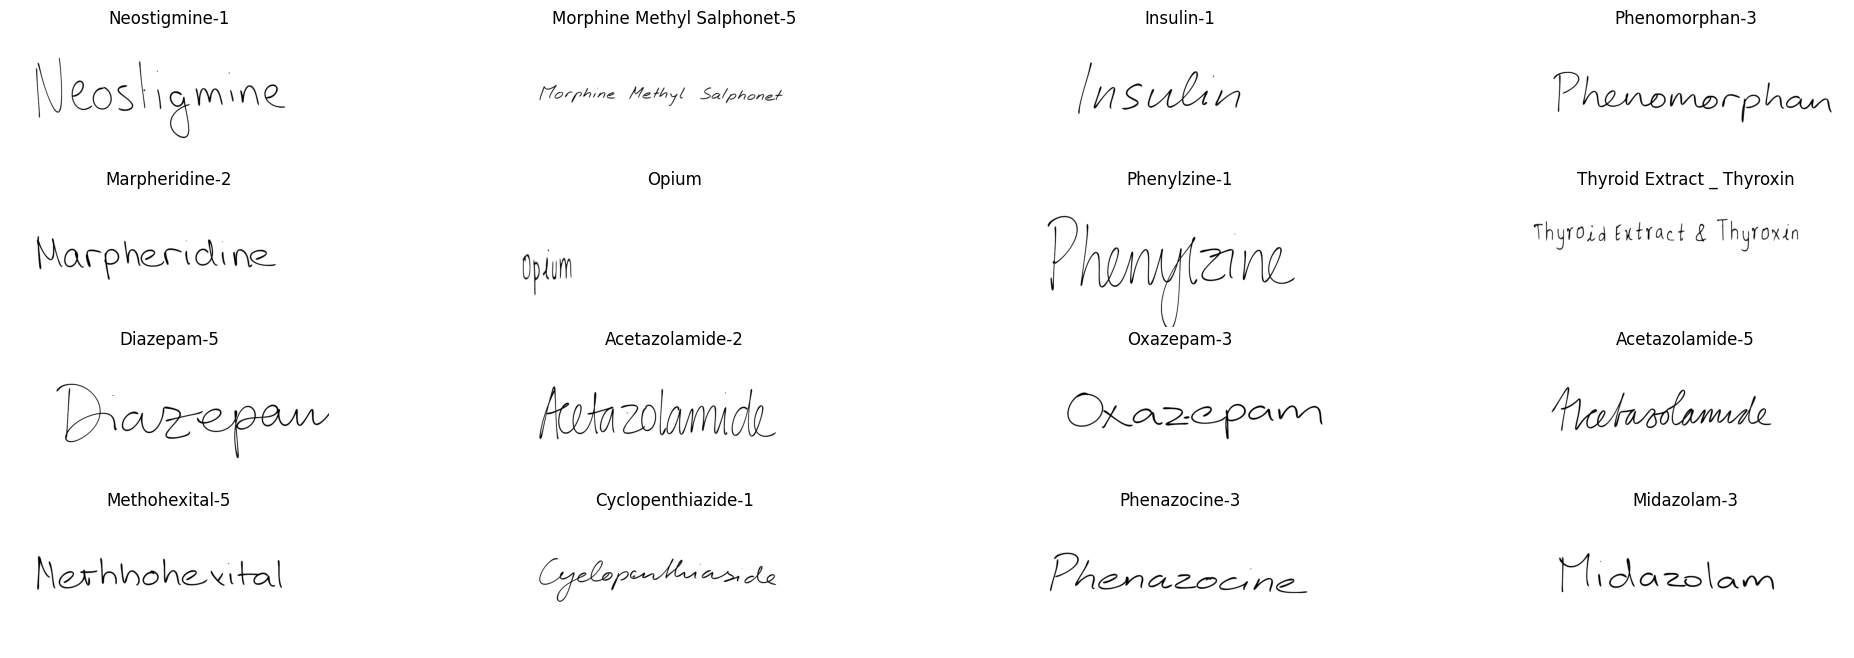

In [ ]:
show_images(data=train_ds, cmap='gray')

# Connectionist Temporal Classification (CTC) Loss:

The **CTC Loss/Layer** is a **crucial component** in an ***OCR model*** as it helps to calculate the **probability distribution** of different characters in an **input image sequence**, and enables the model to **recognize text** in challenging and ***variable handwriting styles.

**CTC (Connectionist Temporal Classification) loss** is a loss function used in **deep learning models** for **sequence-to-sequence tasks** such as ***speech recognition, handwriting recognition, and text recognition***. The **CTC loss** is used to compute the **difference between the predicted output and the ground truth label**.

In the context of ***handwriting recognition***, the **CTC loss** takes in the **predicted sequence of characters** (in the form of **probability distribution** over the characters) and the **actual ground truth label** (which is a sequence of characters) and computes the difference between them. Since the length of the **predicted sequence** can be different from the **length of the ground truth label**, the **CTC loss** is used to align the **two sequences** by adding **blank characters** between the characters of the **predicted sequence**. This ensures that the length of the **predicted sequence matches the length of the ground truth label**.

![image.png](attachment:ea1edc0f-eda8-46b0-886d-72d48a36ff7e.png)

The **CTC loss** is calculated by **summing over all possible alignments** between the **predicted sequence** and the **ground truth label**. This is done by **dynamic programming**, which finds the most likely path through the **probability distribution of characters**. The **CTC loss function** then computes the **negative log probability** of the correct alignment. The goal of the **CTC loss** is to **minimize the difference between the predicted sequence and the ground truth label**.

![image.png](attachment:b25b1423-f280-4143-afd0-922b99d16fda.png)

In summary, the **CTC loss** is used in ***sequence-to-sequence tasks*** to align the **predicted sequence and the ground truth label** by adding ***blank characters*** between the characters of the predicted sequence. The **CTC loss** is calculated by **dynamic programming**, and its goal is to ***minimize the difference between the predicted sequence and the ground truth label***.

In [ ]:
class CTCLayer(layers.Layer):

    def __init__(self, **kwargs) -> None:
        super().__init__(**kwargs)

        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):

        batch_len = tf.cast(tf.shape(y_true)[0], dtype='int64')

        input_len = tf.cast(tf.shape(y_pred)[1], dtype='int64') * tf.ones(shape=(batch_len, 1), dtype='int64')
        label_len = tf.cast(tf.shape(y_true)[1], dtype='int64') * tf.ones(shape=(batch_len, 1), dtype='int64')

        loss = self.loss_fn(y_true, y_pred, input_len, label_len)

        self.add_loss(loss)

        return y_pred

# OCR Model:

The ***optical character recognition (OCR)*** model is a powerful combination of ***convolutional neural networks (CNNs)*** and ***recurrent neural networks (RNNs)***. The **CNNs** are used to extract **high-level features** from the input images, while the ***RNNs*** are used to **generate the corresponding text output**.

These **two types of neural networks** are combined in a **transformer-like architecture**, which can be thought of as an ***Encoder-Decoder architecture***. In this architecture, the ***CNN*** serves as the ***Encoder***, which encodes the **image features** into an **encoding space**. The ***RNN*** then acts as the ***Decoder***, which uses this **encoding space** to generate the **corresponding text output**.

The use of this architecture allows the model to handle the **challenging task of recognizing handwritten text**, which is **often messy and difficult to read**. By leveraging both the **spatial information** from the ***CNNs*** and the **temporal information** from the ***RNNs***, the OCR model can **accurately recognize even the most complex handwritten text**.

Furthermore, to train the **OCR model**, a **loss function** called the ***Connectionist Temporal Classification (CTC) loss*** is used. This loss function allows the model to learn how to align the **predicted text output with the actual text output**, even in cases where there may be **missing or extra characters** in the input image. Overall, the OCR model is a powerful and effective tool for recognizing text in a wide variety of settings.

In [ ]:
# Input Layer
input_images = layers.Input(shape=(IMG_WIDTH, IMG_HEIGHT, 1), name="image")

# Labels : These are added for the training purpose.
target_labels = layers.Input(shape=(None, ), name="label")

# CNN Network
x = layers.Conv2D(
    filters=32,
    kernel_size=3,
    strides=1,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)(input_images)

x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Conv2D(
    filters=64,
    kernel_size=3,
    strides=1,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)(x)

x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

# Encoding Space
encoding = layers.Reshape(target_shape=((IMG_WIDTH//4), (IMG_HEIGHT//4)*64))(x)
encoding = layers.Dense(64, activation='relu', kernel_initializer='he_normal')(encoding)
encoding = layers.Dropout(0.2)(encoding)

# RNN Network
x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(encoding)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)

# Output Layer
output = layers.Dense(len(char_to_num.get_vocabulary())+1, activation='softmax')(x)

# CTC Layer
ctc_layer = CTCLayer()(target_labels, output)

# Model
ocr_model = keras.Model(
    inputs=[input_images, target_labels],
    outputs=[ctc_layer]
)

In [ ]:
ocr_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 image (InputLayer)          [(None, 950, 400, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 950, 400, 32)         320       ['image[0][0]']               
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 475, 200, 32)         0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 475, 200, 64)         18496     ['max_pooling2d[0][0]']   

In [ ]:
# Compile
ocr_model.compile(optimizer='adam')

# Train
history = ocr_model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=EPOCHS,
    callbacks=CALLBACKS
)

Epoch 1/100
101/101 [==============================] - 251s 2s/step - loss: 104.7977 - val_loss: 57.1855
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


101/101 [==============================] - 23s 226ms/step - loss: 55.3036 - val_loss: 55.1581
Epoch 3/100
101/101 [==============================] - 23s 230ms/step - loss: 51.7513 - val_loss: 50.8399
Epoch 4/100
101/101 [==============================] - 23s 227ms/step - loss: 48.7243 - val_loss: 48.7450
Epoch 5/100
101/101 [==============================] - 22s 219ms/step - loss: 47.2461 - val_loss: 47.8437
Epoch 6/100
101/101 [==============================] - 25s 250ms/step - loss: 46.4096 - val_loss: 47.5350
Epoch 7/100
101/101 [==============================] - 22s 221ms/step - loss: 45.6615 - val_loss: 47.1377
Epoch 8/100
101/101 [==============================] - 22s 219ms/step - loss: 44.8035 - val_loss: 46.6113
Epoch 9/100
101/101 [==============================] - 23s 224ms/step - loss: 44.0996 - val_loss: 45.7490
Epoch 10/100
101/101 [==============================] - 23s 224ms/step - loss: 43.4251 - val_loss: 45.3608
Epoch 11/100
101/101 [==============================] - 2

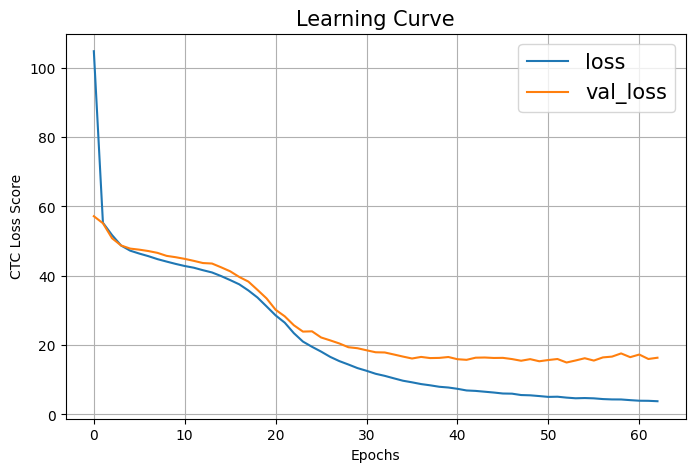

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.legend(fontsize=15)
plt.xlabel("Epochs")
plt.ylabel("CTC Loss Score")
plt.title("Learning Curve", fontsize=15)
plt.grid()
plt.savefig("OCRModel-LearningCurve.png")
plt.show()

# OCR Model Predictions:

In order to use our trained model for **making predictions**, we need to first **remove the CTC layer** from the model. This layer was added for **training purposes only** and is **not required for making predictions**. Once we have removed this layer, we can use the remaining ***encoder-decoder network*** for prediction.

However, the **output of this network** will be a **series of numeric values**, which represent the **probabilities of each character** being present in the image. To convert these **numeric values** into the **actual characters or categorical values**, we need a ***decoding function***.

This **decoding function** takes the **output of the model** and decodes it into the **final predicted text**. There are **different decoding strategies** that can be used, such as ***greedy decoding*** or ***beam search decoding***. The specific strategy used will depend on the requirements of the task and the characteristics of the data.

Once we have the **decoding function**, we can use it to convert the **model's output into the final predicted text**, which can then be compared to the **ground truth labels** to evaluate the **performance of the model**.

In [ ]:
# Model required for inference
inference_model = keras.Model(
    inputs=ocr_model.get_layer(name="image").input,
    outputs=ocr_model.get_layer(name='dense_1').output
)

# Model summary
inference_model.summary()

NameError: ignored

Now, as we have the inference model, let's focus on the **decoding function**

---
The **predictions generated** by the **OCR model** are in the form of a **matrix** where each **time step** represents the **probabilities for each character**. This means that for each **time step**, the model calculates the **likelihood of the output character being a certain character**.

The resulting **matrix** can be **quite complex** and may be **difficult to interpret at first glance**. However, if you have studied the ***Connectionist Temporal Classification (CTC)*** algorithm, this representation will be **easier to understand**. The **CTC algorithm** is a technique used to train the model to make predictions on sequences of variable length, which is often used in **speech and handwriting recognition tasks**.

In [ ]:
def decode_pred(pred_label):

    '''
    The decode_pred function is used to decode the predicted labels generated by the OCR model.
    It takes a matrix of predicted labels as input, where each time step represents the probability
    for each character. The function uses CTC decoding to decode the numeric labels back into their
    character values. The function also removes any unknown tokens and returns the decoded texts as a
    list of strings. The function utilizes the num_to_char function to map numeric values back to their
    corresponding characters. Overall, the function is an essential step in the OCR process, as it allows
    us to obtain the final text output from the model's predictions.

    Argument :
        pred_label : These are the model predictions which are needed to be decoded.

    Return:
        filtered_text : This is the list of all the decoded and processed predictions.

    '''

    # Input length
    input_len = np.ones(shape=pred_label.shape[0]) * pred_label.shape[1]

    # CTC decode
    decode = keras.backend.ctc_decode(pred_label, input_length=input_len, greedy=True)[0][0][:,:MAX_LABEL_LENGTH]

    # Converting numerics back to their character values
    chars = num_to_char(decode)

    # Join all the characters
    texts = [tf.strings.reduce_join(inputs=char).numpy().decode('UTF-8') for char in chars]

    # Remove the unknown token
    filtered_texts = [text.replace('[UNK]', " ").strip() for text in texts]

    return filtered_texts

In [ ]:
print(decode_pred(inference_model.predict(test_ds)))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['label'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


30/30 [==============================] - 67s 2s/step
['Betropropoxyphene-3', 'Guutethiamde-5', 'Pentanyl-5', 'Phethidene-3', 'Etorphine-3', 'Methadone-3', 'Dextropropoxyphene-3', 'Pholcodine-3', 'Buprenorphine-3', 'Pentany-5', 'Coine-3', 'Codeine-3', 'Mcetyl methadrl-5', 'Lorazapam-5', 'Hentoba lbital-5', 'Alpha prodine-3', 'Midazolam-5', 'Hpomorphine-3', 'Oazepam-5', 'Hcetyl hydocodinon-3', 'Phentermine-3', 'Alprazolam-3', 'Phrazepam-5', 'Benzithidin-3', 'Modazcpamm-5', 'Oxazolam-5', 'Mhidaziola-5', 'Lorazepam-5', 'Nitrarzepam-3', 'Medazcp-5', 'Oazolam-5', 'Cloazamine-5', 'Dne-', 'Pentazocine-3', 'Oazepa-5', 'Hcetephin Hhydriochloride-5', 'Nitraepam-5', 'Meprobamate-5', 'Pentolarbital-5', 'Priazolaim-3', 'Dimephoptanoe-5', 'Benzitramide-3', 'Bita acetyl methadol-1', 'Dmethyl thyambutine-3', 'Codeine Methyl Bromide-5', 'Dextroraphan-3', 'Eloxceridine-3', 'Dihyylrrog Ddztr orpho hydroton-1', 'Ethyl methyl Thyambutine-4', 'Benzyl morphne-5', 'Etonitazine-3', 'Biimethyl Thyambutine-5', 'D

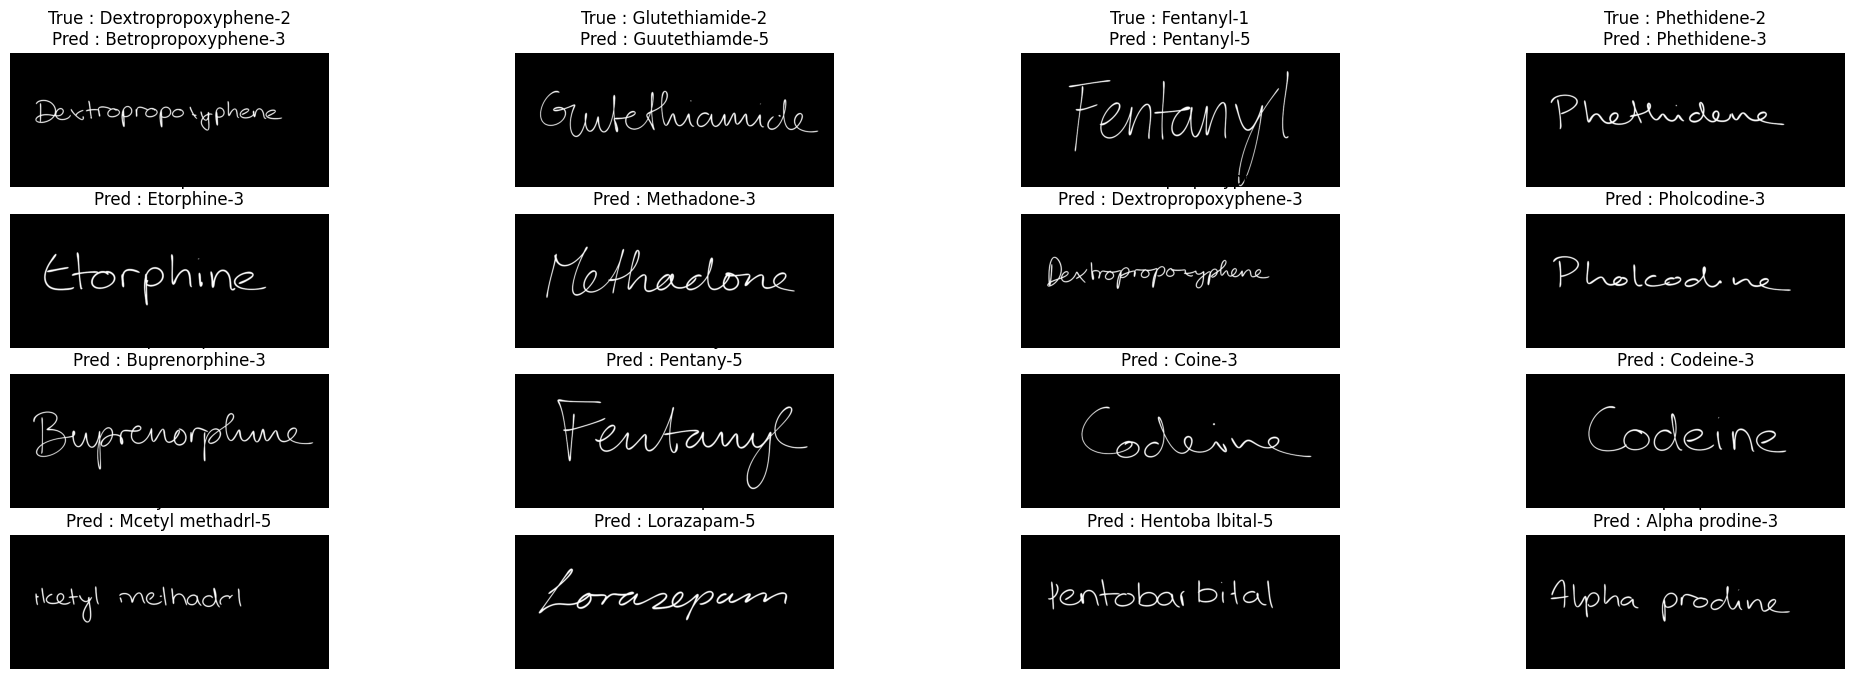

In [ ]:
show_images(data=test_ds, model=inference_model, decode_pred=decode_pred, cmap='binary')

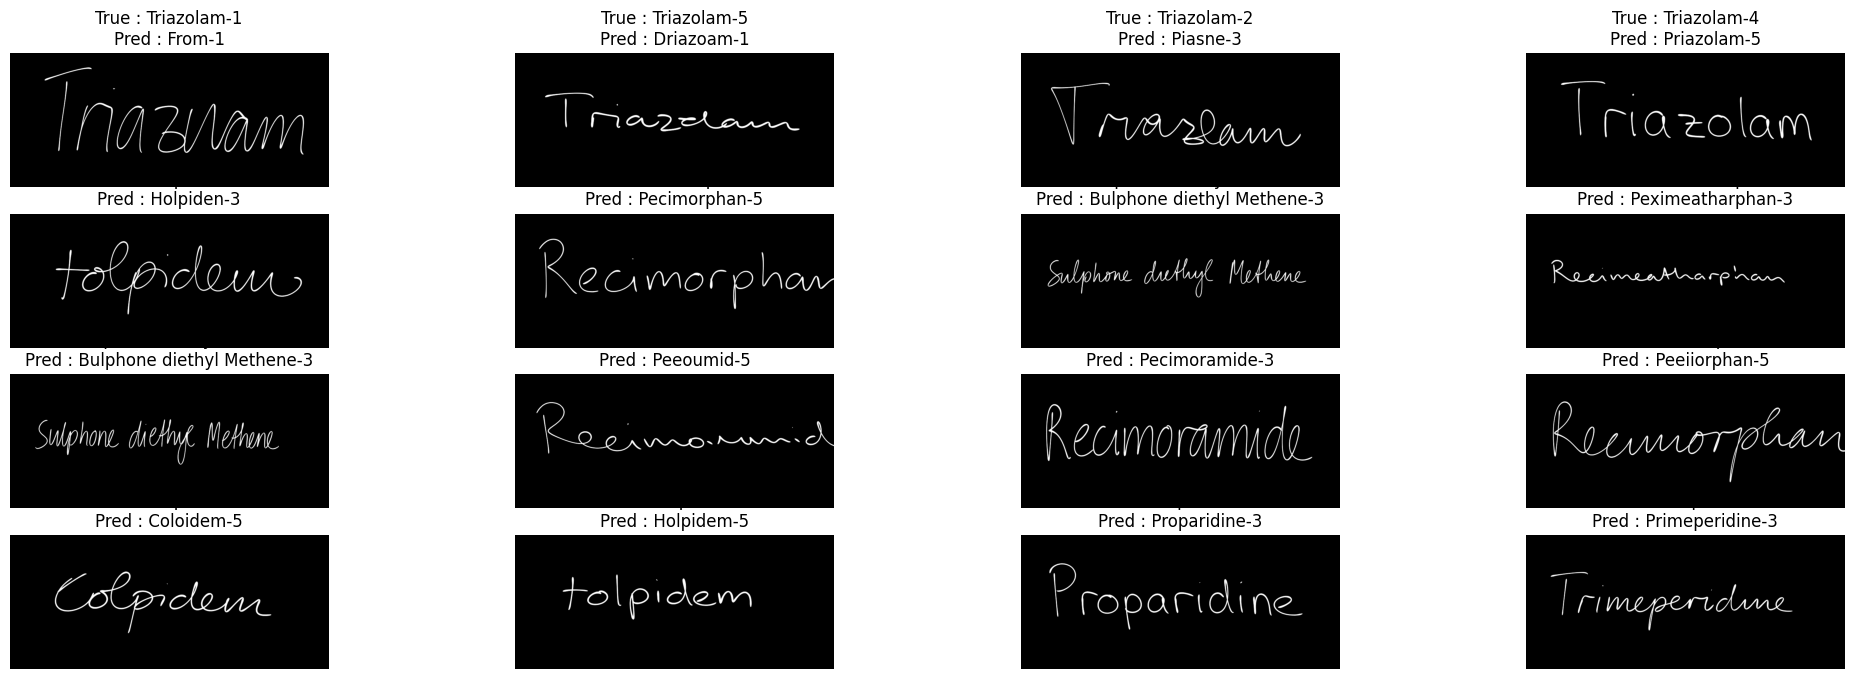

In [ ]:
show_images(data=valid_ds, model=inference_model, decode_pred=decode_pred, cmap='binary')

# OCR model with attention, encoder, and decoder.

Source: (https://arxiv.org/abs/2201.09390)

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Dropout, LSTM, Bidirectional, Reshape, Attention, RepeatVector
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import callbacks
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import Lambda


# Input Layer
input_images = Input(shape=(IMG_WIDTH, IMG_HEIGHT, 1), name="image")

# Labels: Added for training purposes.
target_labels = Input(shape=(None, ), name="label")

# Additional Convolutional Layers
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(input_images)
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

# Encoding Space
encoding = Reshape(target_shape=((IMG_WIDTH // 4), (IMG_HEIGHT // 4) * 128))(x)
encoding = Dense(64, activation='relu', kernel_initializer='he_normal')(encoding)
encoding = Dense(128, activation='relu', kernel_initializer='he_normal')(encoding)
encoding = Dropout(0.4)(encoding)

# Attention Layer
attention = Attention()([encoding, encoding])

# Set the maximum sequence length based on your data
max_sequence_length = MAX_LABEL_LENGTH

# Repeat the context vector for each time step in the output sequence
attention = Lambda(lambda x: K.mean(x, axis=1))(attention)  # or use another method to reduce the dimensions
attention = RepeatVector(max_sequence_length)(attention)

# RNN Decoder with Attention
decoder_input = Input(shape=(None, len(char_to_num.get_vocabulary()) + 1))
decoder_lstm = Bidirectional(LSTM(256, return_sequences=True, dropout=0.25))(decoder_input)
decoder_attention = Attention()([attention, decoder_lstm])
decoder_output = Dense(len(char_to_num.get_vocabulary()) + 1, activation='softmax')(decoder_attention)

# CTC Layer
ctc_layer = CTCLayer()(target_labels, decoder_output)

# Model
ocr_model_3 = Model(
    inputs=[input_images, target_labels, decoder_input],
    outputs=[ctc_layer]
)

# Compile
ocr_model_3.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3))

# Train
history_3 = ocr_model_3.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=EPOCHS,
    callbacks=[
        callbacks.EarlyStopping(patience=5, restore_best_weights=True)
    ]
)

# Learning Curve
pd.DataFrame(history_3.history).plot(figsize=(8, 5))
plt.legend(fontsize=15)
plt.xlabel("Epochs")
plt.ylabel("CTC Loss Score")
plt.title("Learning Curve", fontsize=15)
plt.grid()
plt.show()

NameError: ignored

In [ ]:
# Model required for inference
inference_model_3 = keras.Model(
    inputs=ocr_model_3.get_layer(name="image").input,
    outputs=ocr_model_3.get_layer(name='dense_4').output
)

# Model summary
inference_model_2.summary()

NameError: ignored

In [ ]:
show_images(data=test_ds, model=inference_model_3, decode_pred=decode_pred, cmap='binary')

NameError: ignored

In [ ]:
show_images(data=valid_ds, model=inference_model_3, decode_pred=decode_pred, cmap='binary')

NameError: ignored